**Objective**

The objective of this notebook is to develop a deep learning model capable of classifying Persian alphabet characters using Convolutional Neural Networks (CNN) and Long Short-Term Memory (LSTM) networks. By leveraging the strengths of CNNs for spatial feature extraction and LSTMs for sequential pattern recognition, the aim is to build a robust classifier that accurately identifies Persian alphabet characters from input images. The model will be trained on a dataset containing images of Persian alphabet characters and evaluated based on its classification performance.

## Import all necessary libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Flatten, MaxPool2D, Dropout, MaxPooling2D, TimeDistributed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

## Loading Data and Preprocessing

In [3]:
inp_dir='/kaggle/input/persian-alphabets-and-numbers/data/data/'
df=pd.read_csv('/kaggle/input/persian-alphabets-and-numbers/labels.csv')

label=df['Label']
df.head()

,File_Name,Label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
image_data=[]
labels=[]

for index, row in tqdm(df.iterrows(), total=len(df), desc="Preprocessing Images"):
    img_name=str(row['File_Name'])+'.png'
    img=tf.keras.preprocessing.image.load_img(os.path.join(inp_dir, img_name), target_size=(30, 30), color_mode="grayscale")
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    image_data.append(img)
    labels.append(row['Label'])

Preprocessing Images: 100%|██████████| 51744/51744 [05:21<00:00, 160.75it/s]


## Splitting the dataset

In [5]:
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [6]:
X_train[0].shape

(30, 30, 1)

In [7]:
y_train

array(['5', 'ﻏ', 'ﻎ', ..., 'ﺻ', '7', 'ﯼ'], dtype='<U1')

In [8]:
# Reshape input data 
X_train = np.reshape(X_train, (-1, 30, 30, 1))
X_test = np.reshape(X_test, (-1, 30, 30, 1))
X_train.shape, X_test.shape

((41395, 30, 30, 1), (10349, 30, 30, 1))

## Label Encoding
Encoding the characters with unique numbers (0-76)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [10]:
len(set(y_train_encoded)),len(set(y_test_encoded))

(77, 77)

## CNN Model

In [17]:
# Define the CNN model
cnn_model =Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(set(y_train_encoded)), activation='softmax'))  

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [18]:
# Compile the model
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [20]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0760 - acc: 0.9713 - val_loss: 0.1824 - val_acc: 0.9439
Epoch 2/20
1294/1294 [==============================] - 6s 4ms/step - loss: 0.0660 - acc: 0.9743 - val_loss: 0.1843 - val_acc: 0.9417
Epoch 3/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0696 - acc: 0.9735 - val_loss: 0.1916 - val_acc: 0.9424
Epoch 4/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0619 - acc: 0.9751 - val_loss: 0.1688 - val_acc: 0.9464
Epoch 5/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0637 - acc: 0.9755 - val_loss: 0.1627 - val_acc: 0.9468
Epoch 6/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0585 - acc: 0.9768 - val_loss: 0.1679 - val_acc: 0.9488
Epoch 7/20
1294/1294 [==============================] - 5s 4ms/step - loss: 0.0567 - acc: 0.9775 - val_loss: 0.1621 - val_acc: 0.9507
Epoch 8/20
1294/1294 [==============================] - 6s 4ms

In [24]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

324/324 [==============================] - 1s 2ms/step - loss: 0.1814 - acc: 0.9516
Test Accuracy: 0.9515895247459412


In [25]:
cnn_model.save('cnn_model.h5')

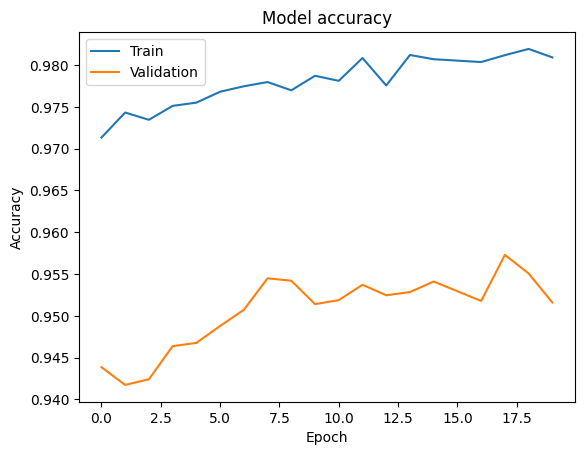

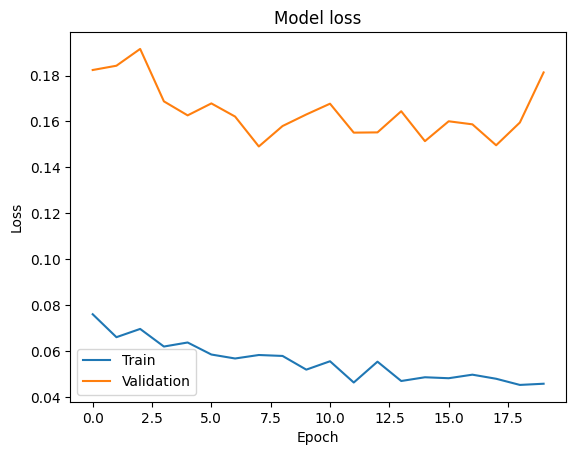

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


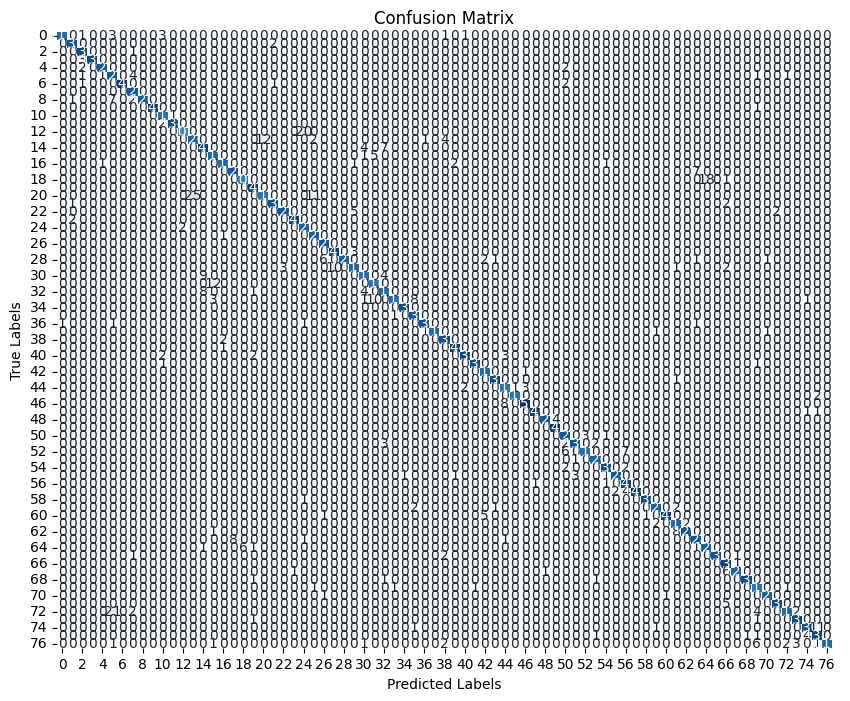

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_pred_categorical = np.argmax(y_pred_categorical, axis=1)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_categorical)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## LSTM Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(30,30)),  # First LSTM layer with return_sequences=True
    LSTM(units=64),  # Second LSTM layer (default: return_sequences=False)
    Dense(units=len(set(y_train_encoded)), activation='softmax')  # Output layer
])

lstm_model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30, 64)            24320     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 77)                5005      
                                                                 
Total params: 62349 (243.55 KB)
Trainable params: 62349 (243.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# Compile the model
lstm_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [74]:
# Train the model
lstm_history = lstm_model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/20
1294/1294 [==============================] - 13s 7ms/step - loss: 2.2848 - acc: 0.3669 - val_loss: 1.4143 - val_acc: 0.5675
Epoch 2/20
1294/1294 [==============================] - 8s 6ms/step - loss: 1.1085 - acc: 0.6630 - val_loss: 0.9178 - val_acc: 0.7165
Epoch 3/20
1294/1294 [==============================] - 8s 6ms/step - loss: 0.7511 - acc: 0.7657 - val_loss: 0.6223 - val_acc: 0.8011
Epoch 4/20
1294/1294 [==============================] - 8s 7ms/step - loss: 0.5621 - acc: 0.8253 - val_loss: 0.5031 - val_acc: 0.8368
Epoch 5/20
1294/1294 [==============================] - 9s 7ms/step - loss: 0.4461 - acc: 0.8587 - val_loss: 0.4297 - val_acc: 0.8586
Epoch 6/20
1294/1294 [==============================] - 8s 7ms/step - loss: 0.3633 - acc: 0.8831 - val_loss: 0.3549 - val_acc: 0.8814
Epoch 7/20
1294/1294 [==============================] - 8s 6ms/step - loss: 0.3151 - acc: 0.8964 - val_loss: 0.3030 - val_acc: 0.8988
Epoch 8/20
1294/1294 [==============================] - 9s 7m

In [75]:
# Evaluate the model
test_loss, test_acc = lstm_model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

324/324 [==============================] - 1s 3ms/step - loss: 0.1392 - acc: 0.9497
Test Accuracy: 0.9496569633483887


In [76]:
lstm_model.save('lstm_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


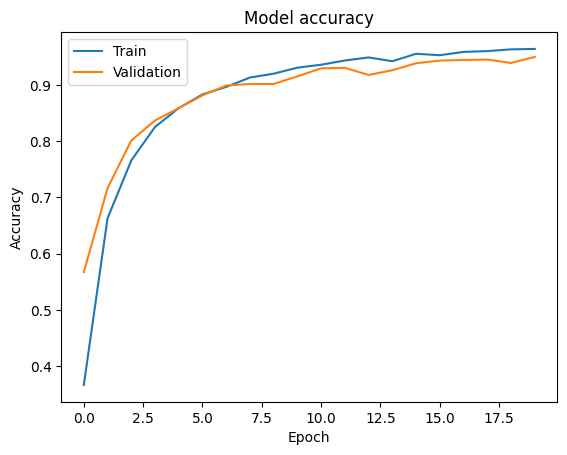

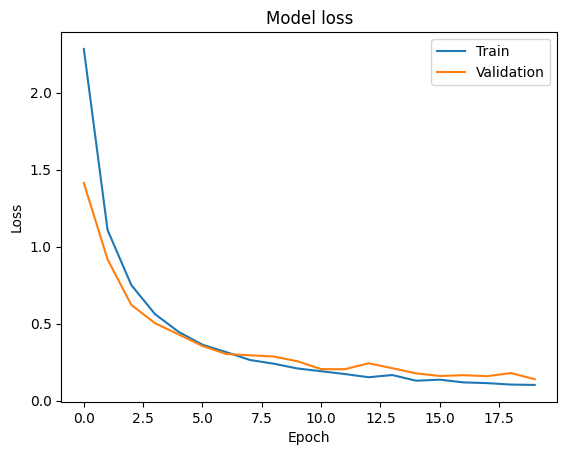

In [77]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


## Hybrid Model (CNN+LSTM)

In [93]:
X_train_reshaped = X_train.reshape((-1, 1, 30, 30, 1))
X_test_reshaped = X_test.reshape((-1, 1, 30, 30, 1))
X_train_reshaped.shape

(41395, 1, 30, 30, 1)

In [96]:
hybrid_model = Sequential()

#CNN part
hybrid_model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu'),input_shape=(1,30,30,1)))
hybrid_model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
hybrid_model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu')))
hybrid_model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
hybrid_model.add(TimeDistributed(Conv2D(32,(3,3),activation='relu')))
hybrid_model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
hybrid_model.add(TimeDistributed(Flatten()))

#LSTM Part
hybrid_model.add(LSTM(100,return_sequences=False))

hybrid_model.add(Dense(len(set(y_train_encoded)),activation='softmax'))

hybrid_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_44 (TimeD  (None, 1, 28, 28, 64)     640       
 istributed)                                                     
                                                                 
 time_distributed_45 (TimeD  (None, 1, 14, 14, 64)     0         
 istributed)                                                     
                                                                 
 time_distributed_46 (TimeD  (None, 1, 12, 12, 64)     36928     
 istributed)                                                     
                                                                 
 time_distributed_47 (TimeD  (None, 1, 6, 6, 64)       0         
 istributed)                                                     
                                                                 
 time_distributed_48 (TimeD  (None, 1, 4, 4, 32)     

In [97]:
hybrid_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [98]:
hybrid_history = hybrid_model.fit(X_train_reshaped,y_train_encoded,epochs = 20,batch_size=32, validation_data = (X_test_reshaped, y_test_encoded))

Epoch 1/20
1294/1294 [==============================] - 10s 6ms/step - loss: 2.1926 - acc: 0.4299 - val_loss: 1.2219 - val_acc: 0.6625
Epoch 2/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.9232 - acc: 0.7292 - val_loss: 0.7294 - val_acc: 0.7812
Epoch 3/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.5910 - acc: 0.8207 - val_loss: 0.5036 - val_acc: 0.8427
Epoch 4/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.4302 - acc: 0.8657 - val_loss: 0.4304 - val_acc: 0.8549
Epoch 5/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.3355 - acc: 0.8925 - val_loss: 0.3487 - val_acc: 0.8841
Epoch 6/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.2757 - acc: 0.9106 - val_loss: 0.3059 - val_acc: 0.8965
Epoch 7/20
1294/1294 [==============================] - 7s 5ms/step - loss: 0.2310 - acc: 0.9230 - val_loss: 0.2743 - val_acc: 0.9085
Epoch 8/20
1294/1294 [==============================] - 7s 5m

In [99]:
# Evaluate the model
test_loss, test_acc = hybrid_model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", test_acc)

324/324 [==============================] - 1s 3ms/step - loss: 0.1659 - acc: 0.9422
Test Accuracy: 0.9422166347503662


In [100]:
hybrid_model.save('hybrid_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


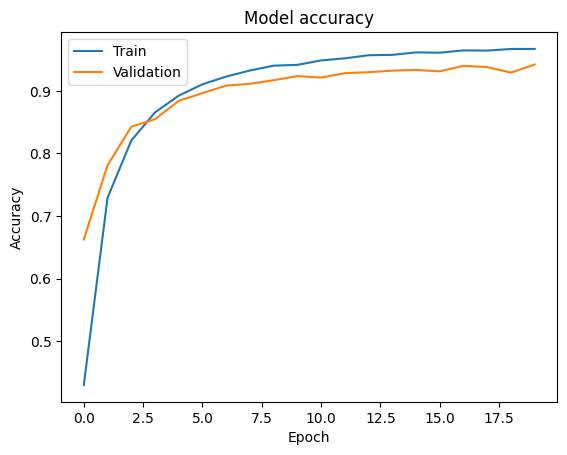

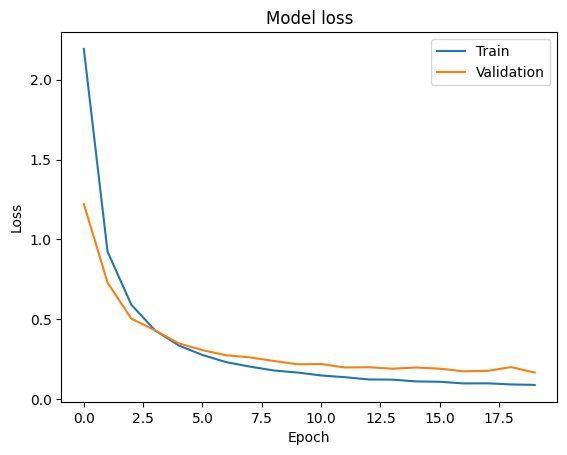

In [101]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hybrid_history.history['acc'])
plt.plot(hybrid_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hybrid_history.history['loss'])
plt.plot(hybrid_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Models Performance

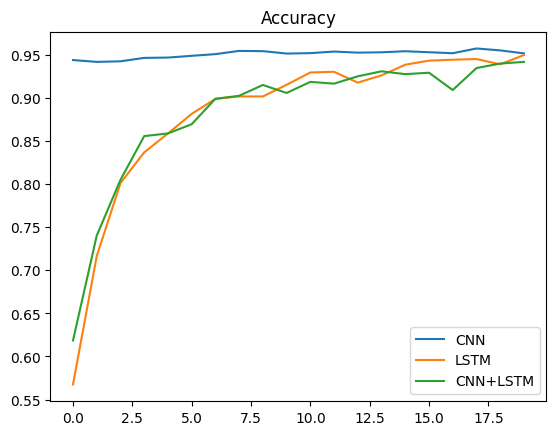

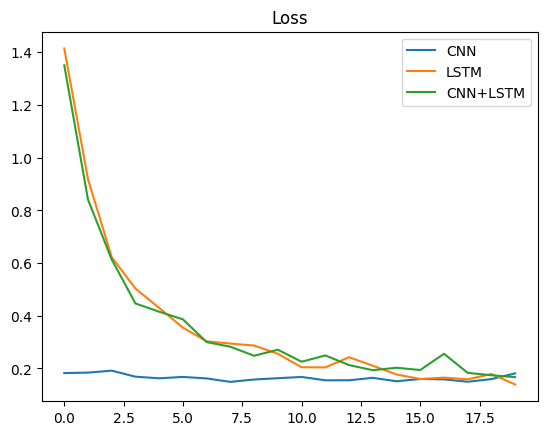

In [83]:
plt.plot(cnn_history.history['val_acc'],label='CNN')
plt.plot(lstm_history.history['val_acc'],label='LSTM')
plt.plot(hybrid_history.history['val_acc'],label='CNN+LSTM')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(cnn_history.history['val_loss'],label='CNN')
plt.plot(lstm_history.history['val_loss'],label='LSTM')
plt.plot(hybrid_history.history['val_loss'],label='CNN+LSTM')
plt.title("Loss")
plt.legend()
plt.show()

**Findings**

1. Standalone CNN Model: The standalone CNN model achieved a classification accuracy of 95.1% on the test dataset. This indicates that the CNN model was effective in extracting relevant features from the input images of Persian alphabet characters and making accurate predictions.

2. Standalone LSTM Model: The standalone LSTM model reported a classification accuracy of 94.9% on the test dataset. This suggests that the LSTM model was successful in capturing sequential patterns in the input data and performing well in classifying Persian alphabet characters.

3. Hybrid Model: Surprisingly, the hybrid CNN-LSTM model yielded a slightly lower classification accuracy of 94.2% compared to the standalone models. This suggests that the combination of CNN and LSTM layers did not provide significant improvement over using either model alone for Persian alphabet classification.